In [2]:
from google.colab import drive
csv_data = drive.mount('/my-drive')

Mounted at /my-drive


In [3]:
import pandas as pd
data = pd.read_csv('/my-drive/MyDrive/Colab Notebooks/MINI PROJECT/tweets.csv')
data

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [4]:
print(data[data['location']=='arohaonces'])

          id  keyword    location  \
11366  11366  wrecked  arohaonces   

                                                    text  target  
11366  i feel directly attacked 💀 i consider moonbin ...       0  


In [5]:
data_new = data.drop(['id','keyword','location'],axis=1)
data_new.shape

(11370, 2)

In [6]:
data_new.dtypes

text      object
target     int64
dtype: object

In [7]:
import re
import string

In [8]:
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [9]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [10]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [11]:
data_new['text'] = data_new['text'].apply(lambda x : remove_url(x))
data_new['text'] = data_new['text'].apply(lambda x : remove_emoji(x))
data_new['text'] = data_new['text'].apply(lambda x : remove_punct(x))


In [12]:
for col in data_new:
  if data_new[col].dtypes=='object':
    print(data_new[col].unique())
print("new")
print(data_new.text[11366])

['Communal violence in Bhainsa Telangana Stones were pelted on Muslims houses and some houses and vehicles were set ablaze…'
 'Telangana Section 144 has been imposed in Bhainsa from January 13 to 15 after clash erupted between two groups on January 12 Po…'
 'Arsonist sets cars ablaze at dealership ' ...
 'i feel directly attacked  i consider moonbin amp jinjin as my bias and im currently wrecked by rocky i hate this '
 'ok who remember outcast nd the dora au THOSE AU WRECKED OUR NERVES ND BRAINCELLS JDKSHSSJHS LEGENDS'
 'Jake Corway wrecked while running 14th at IRP']
new
i feel directly attacked  i consider moonbin amp jinjin as my bias and im currently wrecked by rocky i hate this


In [13]:
data_new.dtypes

text      object
target     int64
dtype: object

In [14]:
data_new.groupby('target').count()

,text
target,
0,9256
1,2114


In [15]:
X = data_new.drop('target',axis='columns')
y = data_new['target']
X

,text
0,Communal violence in Bhainsa Telangana Stones ...
1,Telangana Section 144 has been imposed in Bhai...
2,Arsonist sets cars ablaze at dealership
3,Arsonist sets cars ablaze at dealership
4,Lord Jesus your love brings freedom and pardon...
...,...
11365,Media should have warned us well in advance Th...
11366,i feel directly attacked i consider moonbin a...
11367,i feel directly attacked i consider moonbin a...
11368,ok who remember outcast nd the dora au THOSE A...


In [16]:
y.value_counts()

0    9256
1    2114
Name: target, dtype: int64

In [17]:
df_class_1 = data_new[data_new['target']==1]
df_class_0 = data_new[data_new['target']==0]
df_class_0.shape,df_class_1.shape

((9256, 2), (2114, 2))

In [18]:
df_class_0_undersam = df_class_0.sample(df_class_1.shape[0])
df_class_0_undersam.shape,df_class_1.shape

((2114, 2), (2114, 2))

In [19]:
df = pd.concat([df_class_0_undersam,df_class_1])
df['target'][1],df.shape

(1, (4228, 2))

In [26]:
!pip install transformers


     |████████████████████████████████| 4.0 MB 32.7 MB/s 
     |████████████████████████████████| 77 kB 8.6 MB/s 
     |████████████████████████████████| 895 kB 65.3 MB/s 
     |████████████████████████████████| 596 kB 66.2 MB/s 
     |████████████████████████████████| 6.6 MB 57.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [27]:
import transformers as ppb

In [31]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

In [32]:
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [34]:
tokenized = df['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [36]:
import numpy as np

In [37]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [38]:
np.array(padded).shape

(4228, 44)

In [39]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(4228, 44)

In [43]:
import warnings
import torch

In [44]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [45]:
features = last_hidden_states[0][:,0,:].numpy()

In [46]:
labels = df['target']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels,stratify = labels)

In [48]:
y_train.value_counts()

0    1586
1    1585
Name: target, dtype: int64

In [23]:
!pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 33.4 MB/s 
     |████████████████████████████████| 462 kB 69.4 MB/s 


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [62]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [63]:
lr_clf.score(X_test, y_test)

0.8145695364238411

In [49]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [50]:
def get_sentence_embedding(sentences):
  preprocessed_text = bert_preprocess(sentences)
  return bert_encoder(preprocessed_text)['pooled_output']


In [52]:
#Bert Layer
text_input = tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
output = get_sentence_embedding(text_input)

# Neural Network Layer
hidden1 = tf.keras.layers.Dropout(0.1,name='dropout')(output)
l = tf.keras.layers.Dense(1, activation='sigmoid',name = 'hidden')(hidden1)
# final model
model = tf.keras.Model(inputs = [text_input],outputs=[l])


In [53]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [54]:
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy'),
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall'),
]
model.compile(optimizer = 'adam',
              loss ='binary_crossentropy',
              metrics = METRICS)

In [56]:
model.fit(X_train,y_train,epochs = 10)

Epoch 1/10


ValueError: ignored

In [ ]:
model.evaluate(X_test,y_test)

NameError: ignored

In [68]:
import numpy as np
y_predicted = lr_clf.predict(X_test)
y_predicted_flattend = y_predicted.flatten()
y_predicted = np.where(y_predicted_flattend > 0.5, 1, 0)
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test, y_predicted)
matrix

array([[434,  94],
       [102, 427]])

Text(33.0, 0.5, 'Truth')

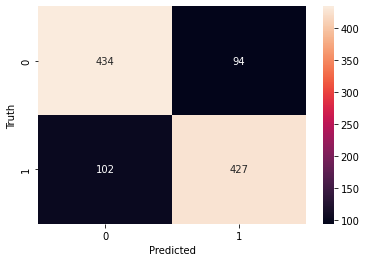

In [66]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

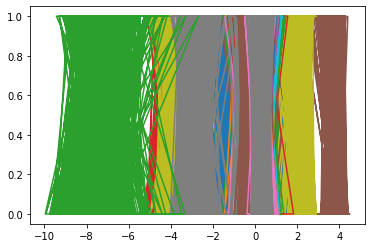

In [73]:
plt.plot(X_test,y_predicted);

In [71]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       528
           1       0.82      0.81      0.81       529

    accuracy                           0.81      1057
   macro avg       0.81      0.81      0.81      1057
weighted avg       0.81      0.81      0.81      1057

